In [74]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
sns.set()
train = pd.read_csv(".\\titanic\\test.csv")
test = pd.read_csv(".\\titanic\\train.csv")

In [18]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
# sibsp >> 같이 탄 형제나 배우자 수
# parch >> 같이 탄 부모/자녀 수
# embarked >> 탑승 장소

In [20]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test.shape

(891, 12)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
test.isnull().sum()
#나이와 선실에 대한 정보 유실 많음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
def bar_chart(feature):
    survived = test[test['Survived']==1][feature].value_counts()
    dead = test[test['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

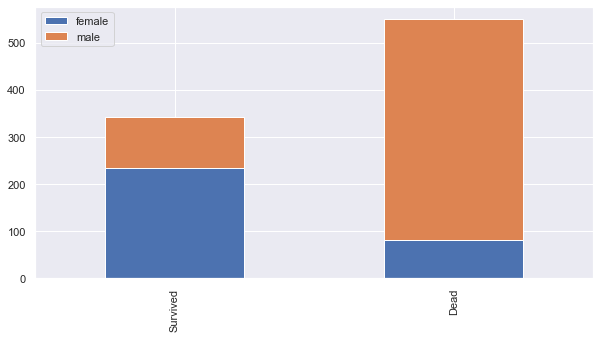

In [50]:
bar_chart('Sex')

#여성의 생존확률이 더 높다

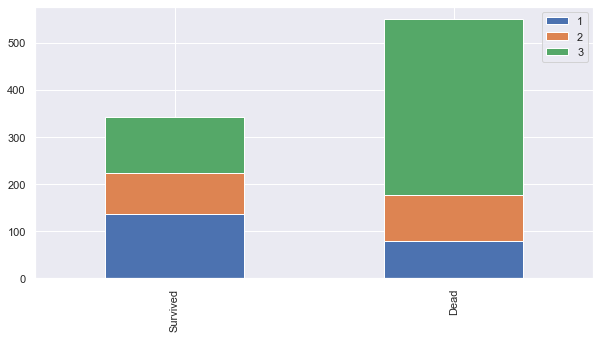

In [51]:
bar_chart('Pclass')
#1등급 클래스 사람들이 더 생존할 확률 높음
#왜그럴까? 배가 뒤에서 부터 가라앉아서 3등급 칸 부터 가라앉기 때문에

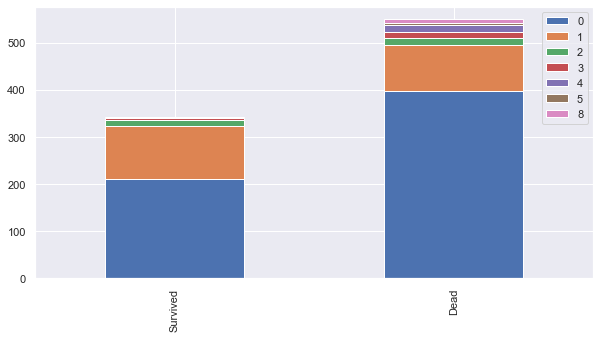

In [52]:
bar_chart('SibSp')
#혼자보다는 형제나 배우자가 있는 사람들이 생존활 확률이 높다

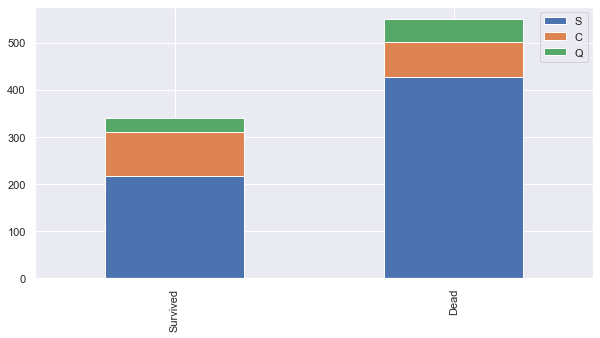

In [53]:
bar_chart('Embarked')
# 혼자인 사람보다 부모나 자식이 있는 사람들이 생존할 확률이 높다

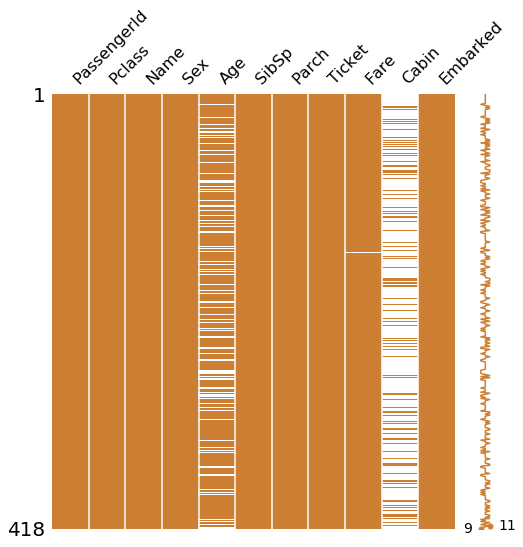

In [34]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
#결측치 확인

In [43]:
train_test_data = [train, test] #훈련 및 시험 데이터 세트 결합

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [44]:
train['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [87]:
train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')

test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [89]:
train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer',
	'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    	['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other',
        'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)
        
test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer',
	'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    	['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other',
        'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)

In [ ]:
test.groupby('Initial')['Survived'].mean().plot.bar()

In [45]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

#Mr,Miss,Mrs만 빼내기

In [46]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [56]:
# 데이터 셋에서 불필요한 feature 삭제
train. drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [57]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [58]:
#나이 전처리
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [59]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,3.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2.0


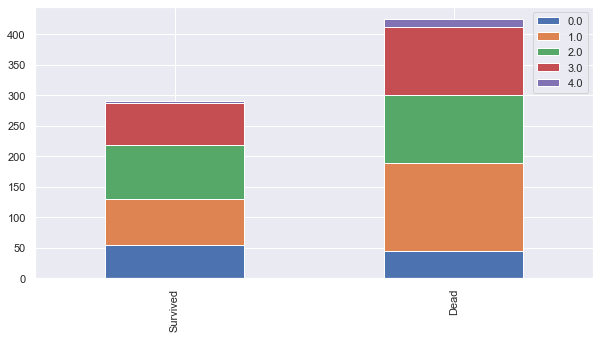

In [60]:
bar_chart('Age')
#확실히 0~16세 애들이 다른 나이대보다 덜 죽었다.

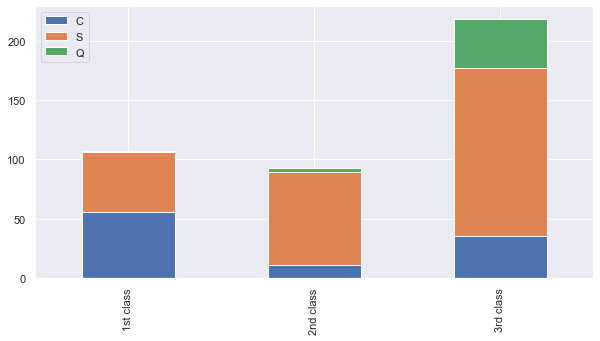

In [61]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

#부자 동네랑 가난한 동네랑 비율 차이가 있지 않을까?

Q도시에서 탄 사람들은 1등석이 거의 없음
c,s도시가 부유한사람.
s도시에서 대부분 탑승함
>> 결측치에 s값 집어넣어보기

In [62]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,3.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2.0


In [63]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## 머신러닝을 위해 숫자로 바꿔주기

In [64]:
train.Cabin.value_counts()

B57 B59 B63 B66    3
C80                2
C116               2
E34                2
C23 C25 C27        2
                  ..
C97                1
C46                1
D19                1
F E46              1
B36                1
Name: Cabin, Length: 76, dtype: int64

In [65]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
#앞의 알파벳만 따오자

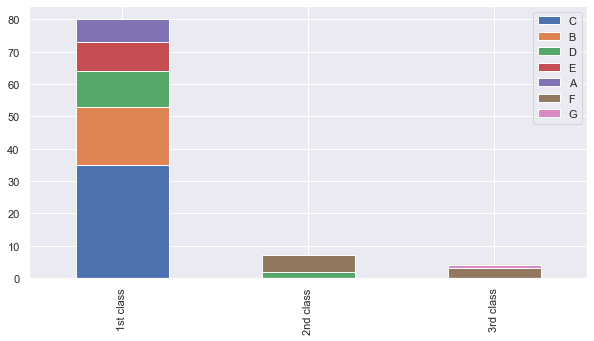

In [66]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

#1등급 = ABCDET / 2등급 = DEF / 3등급 EFG

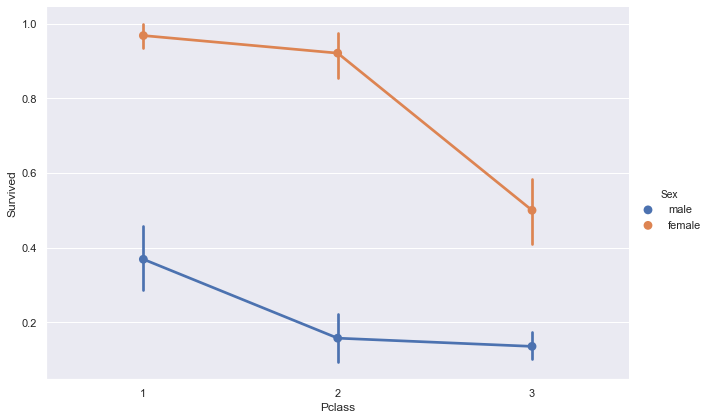

In [72]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=test, size=6, aspect=1.5)
# pclass랑 survived랑 비교하는데 나누는 기준이 sex

C:\Users\samsung\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\samsung\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


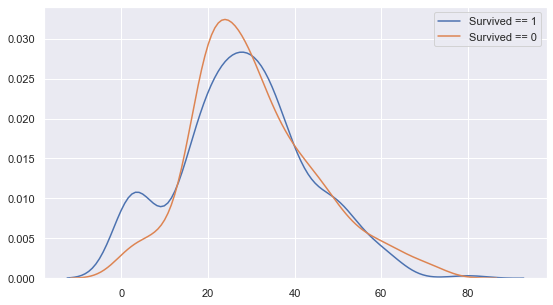

In [78]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(test[test['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(test[test['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()
#나이가 어릴수록 생존자가 많다